Problem 3a

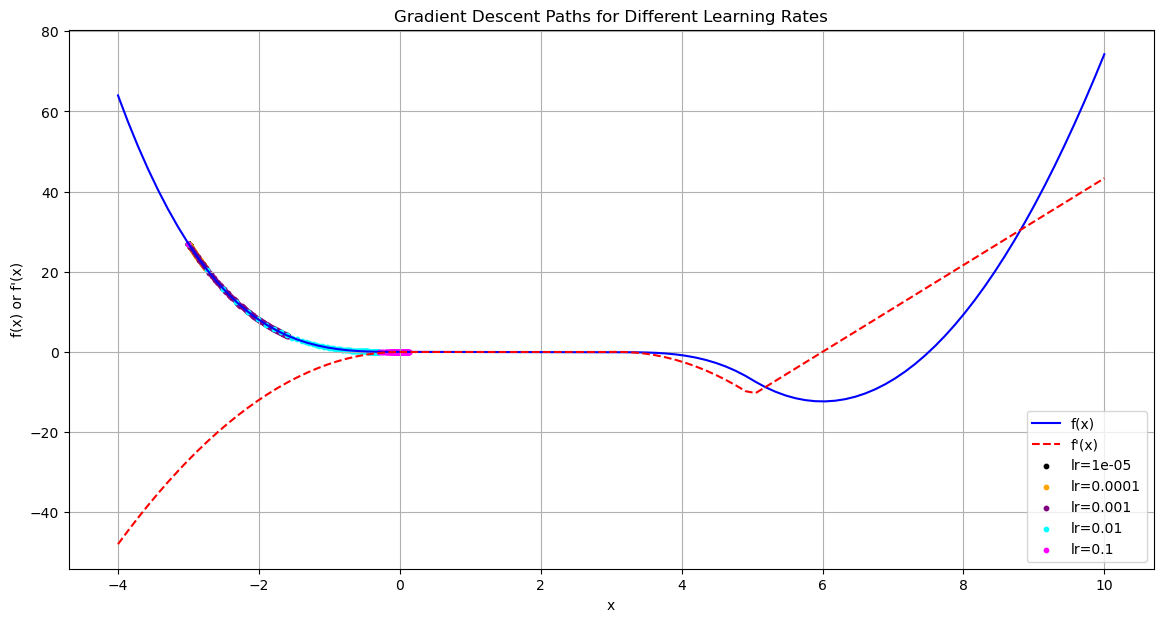

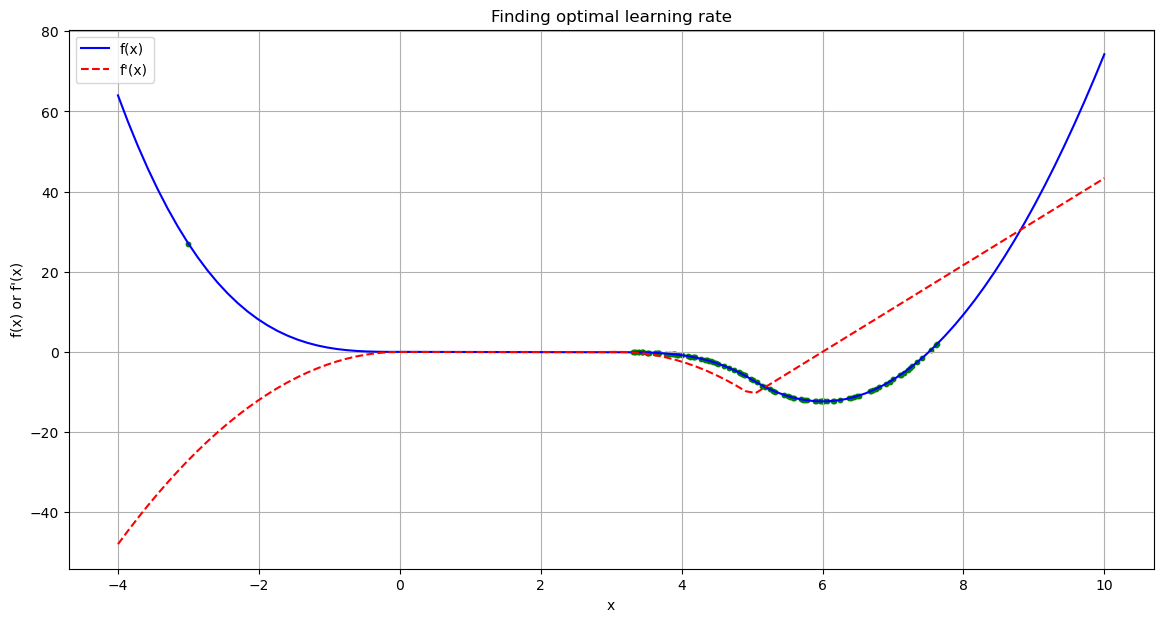

Converged in 430 iterations.


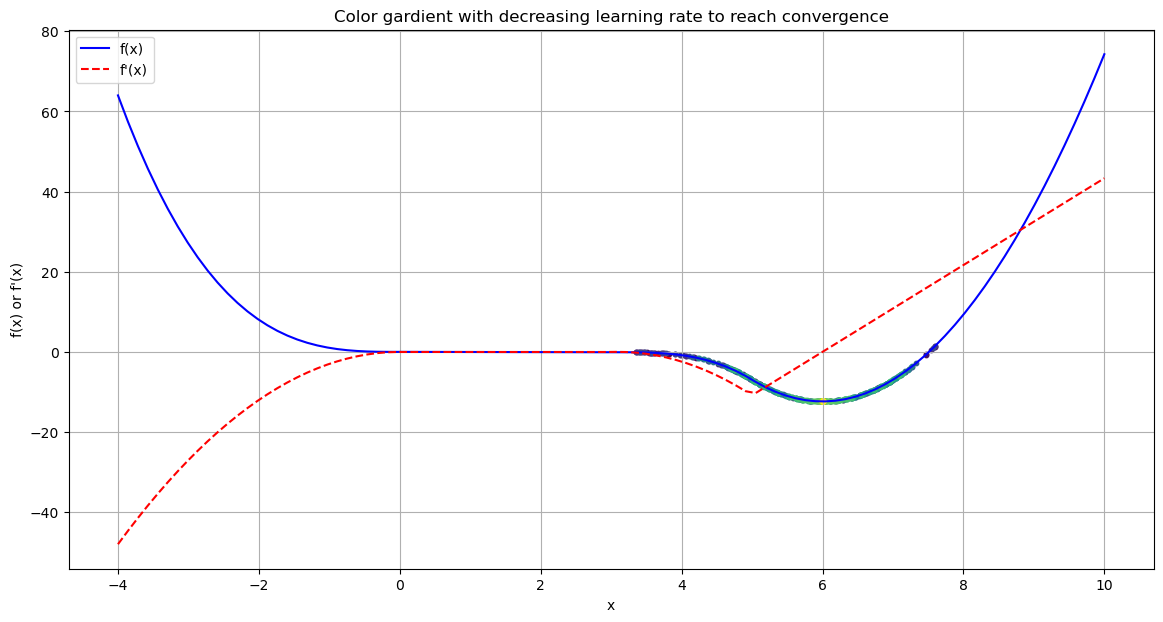

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    
    if x < -1e10 or x > 1e10:
        raise ValueError("x is too large/small, risk of overflow.")
    
    if x<-0.1:
        return -x**3
    elif -0.1<= x < 3:
        return -3*x/100 - 1/500
    elif 3<= x < 5:
        return -(x - 31/10)**3 - 23/250
    else :
        return  1083/200 * (x - 6)**2 - 6183/500
    

def derivative(x):
    
    if x<-0.1:
        return -3 * x**2
    elif -0.1<= x < 3:
        return (-3/100)
    elif 3<= x < 5:
        return -3*(x-31/10)**2
    else :
        return (1083/100*(x-6))
    
def gradient_desc(x_initial,learning_rate,T):
    
    x=x_initial
    data_record =[]
    
    for t in range(T):
        
        try:
            data_record.append((x, func(x)))
            x -= learning_rate * derivative(x)
        except OverflowError:
            print(f"Overflow error at iteration {t}, x = {x}")
            break
        except ValueError as e:
            print(f"Value error: {e} at iteration {t}, x = {x}")
            break
    
        
    return data_record

def optimal_lr(rates,x_initial,T):
    full_record = {}
    opt_rate= None
#     final_func=[]
    min_func_value = float('inf')  # Initialize with infinity
    for rate in rates:
        
        
        hist = gradient_desc(x_initial,rate,T)
        full_record[rate] = hist

        if hist:
            # Find the minimum function value in the entire history
            current_min_func_value = min(value[1] for value in hist)  # Assuming hist is [(x, f(x)), ...]

            # Update the optimal learning rate if a lower function value is found
            if current_min_func_value < min_func_value:
                min_func_value = current_min_func_value
                opt_rate = rate


    #rint(final_func)
    return opt_rate,full_record




def gradient_descent_with_decay(x0,gradient_func,function, initial_lr=0.245, decay_rate=0.9, decay_steps=100, max_iter=1000, tolerance=1e-6):
        
    x = x0  
    lr = initial_lr
    history = []
    func_hist=[]
    
    for i in range(max_iter):
        grad = gradient_func(x)
        x -= lr * grad
        history.append((x, grad))
        func_hist.append((x,function(x)))

        # Exponential decay of the learning rate
        if i % decay_steps == 0 and i != 0:
            lr *= decay_rate

        # Check for convergence
        if abs(grad) < tolerance:
            print(f"Converged in {i} iterations.")
            break

    return x, history,lr,func_hist
    
if __name__ == "__main__":
    
    x_values = np.linspace(-4, 10, 100)  # random values keeping in mine range of x provided
    f_values = np.array([func(x) for x in x_values])  # plotting function
    df_values = np.array([derivative(x) for x in x_values])  # plotting function derivative

    # part (i) and (ii)
    learning_rates = [1e-5,1e-4,1e-3, 1e-2, 1e-1]
    x0 = -3   # initial value of x
    T=100     # number of iterations over which I need to perform gradient descent

    full_record = {}  # dictionary so that I can track values at different iterations
    for rate in learning_rates:
        full_record[rate] = gradient_desc(x0,rate,T)
        
    
    plt.figure(figsize=(14, 7))
    plt.plot(x_values, f_values, label='f(x)', color='blue')
    plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')        
    # Plot gradient descent paths for each learning rate
    colors = ['black', 'orange', 'purple', 'cyan', 'magenta']
    for i, (rate, data_record) in enumerate(full_record.items()):
        data_record = np.array(data_record)
        plt.scatter(data_record[:, 0], data_record[:, 1], color=colors[i], label=f'lr={rate}', s=10) 
    

    plt.xlabel('x')
    plt.ylabel('f(x) or f\'(x)')
    plt.title('Gradient Descent Paths for Different Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('part_ii.png')  # Save the figure
    plt.close()  # Close the figure
    
    
    # part (iii) approach one
    
    testing_learning_rates = np.linspace(0.22, 0.25, 50)
    optimal_rate, histories = optimal_lr(testing_learning_rates,-3,100)
    
    opt_rec=gradient_desc(x0,optimal_rate,T)

    opt_rec = np.array(opt_rec)
    plt.figure(figsize=(14, 7))
        
    plt.plot(x_values, f_values, label='f(x)', color='blue')

    plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')  
    plt.scatter(opt_rec[:, 0], opt_rec[:, 1], color='green', s=10) 
    plt.xlabel('x')
    plt.ylabel('f(x) or f\'(x)')
    plt.title('Finding optimal learning rate')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('part_iv_Optimal_lr.png')  # Save the figure
    plt.close()  # Close the figure
  
    # part (iii) approach two - decaying learning rate
    x_optimal, history,opt_r, hist= gradient_descent_with_decay(x0,derivative,func)
    hist=np.array(hist)
    
    plt.figure(figsize=(14, 7))
    plt.plot(x_values, f_values, label='f(x)', color='blue')
    plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')  

    colors_1 = plt.cm.viridis(np.linspace(0, 1, hist.shape[0]))
    for i in range(hist.shape[0]):
        plt.scatter(hist[i, 0], hist[i, 1], color=colors_1[i], s=10)
    
    plt.xlabel('x')
    plt.ylabel('f(x) or f\'(x)')
    plt.title('Color gardient with decreasing learning rate to reach convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('decaying_lr.png')
    plt.close()

Problem 3b

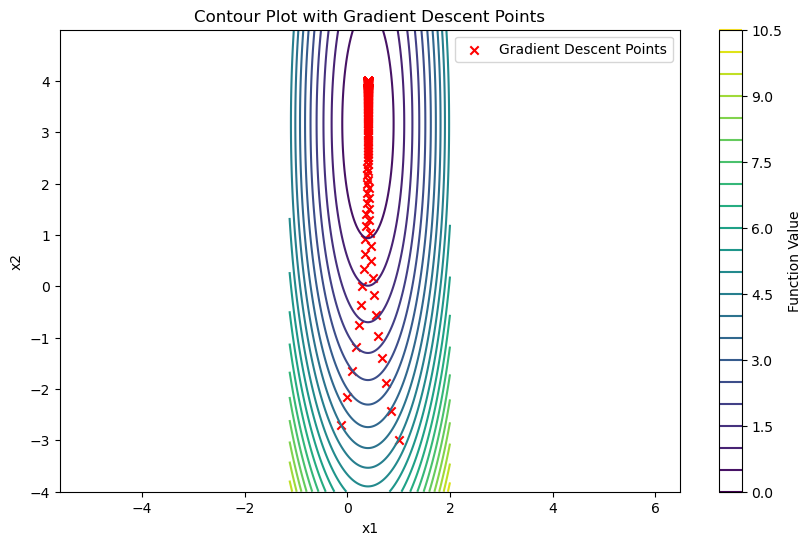

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def quadratic_function(x1, x2, a1, a2, c1, c2):
    return a1 * (x1 - c1)**2 + a2 * (x2 - c2)**2

if __name__ == "__main__":
    
    data = np.loadtxt('gradient_descent_sequence.txt')
    x1 = data[:, 0]
    x2 = data[:, 1]
# Example constants (replace these with your actual constants or estimations)
    a1 = 2.0
    a2 = 0.1
    c1 = np.mean(x1)  # Center of the x1 values
    c2 = np.mean(x2)  # Center of the x2 values
    
    x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1) - 1, max(x1) + 1, 200),
                               np.linspace(min(x2) - 1, max(x2) + 1, 200))
    z = quadratic_function(x1_grid, x2_grid, a1, a2, c1, c2)
    
    # Create the contour plot
    plt.figure(figsize=(10, 6))
    contour = plt.contour(x1_grid, x2_grid, z, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Function Value')

    # Superimpose the scatter plot of gradient descent points
    plt.scatter(x1, x2, c='red', marker='x', label='Gradient Descent Points')

    # Add labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot with Gradient Descent Points')
    plt.legend()
    plt.grid(False)
    plt.axis('equal')
    plt.show()
  

Problem 3c

[1.91373656 1.91171708 1.90969903 1.90768239 1.90566717 1.90365337
 1.901641   1.89963004 1.8976205  1.89561237 1.89360567 1.89160038
 1.8895965  1.88759404 1.885593   1.88359337 1.88159516 1.87959836
 1.87760297 1.87560899 1.87361643 1.87162528 1.86963554 1.86764721
 1.86566029 1.86367478 1.86169068 1.85970798 1.8577267  1.85574682
 1.85376835 1.85179129 1.84981563 1.84784138 1.84586853 1.84389709
 1.84192705 1.83995842 1.83799119 1.83602536 1.83406093 1.83209791
 1.83013628 1.82817606 1.82621724 1.82425981 1.82230379 1.82034916
 1.81839593 1.8164441  1.81449367 1.81254463 1.81059699 1.80865075
 1.8067059  1.80476244 1.80282038 1.80087971 1.79894044 1.79700256
 1.79506607 1.79313097 1.79119726 1.78926494 1.78733402 1.78540448
 1.78347633 1.78154957 1.7796242  1.77770022 1.77577762 1.77385641
 1.77193658 1.77001815 1.76810109 1.76618542 1.76427114 1.76235824
 1.76044672 1.75853658 1.75662783 1.75472046 1.75281447 1.75090986
 1.74900663 1.74710478 1.74520431 1.74330521 1.7414075  1.7395

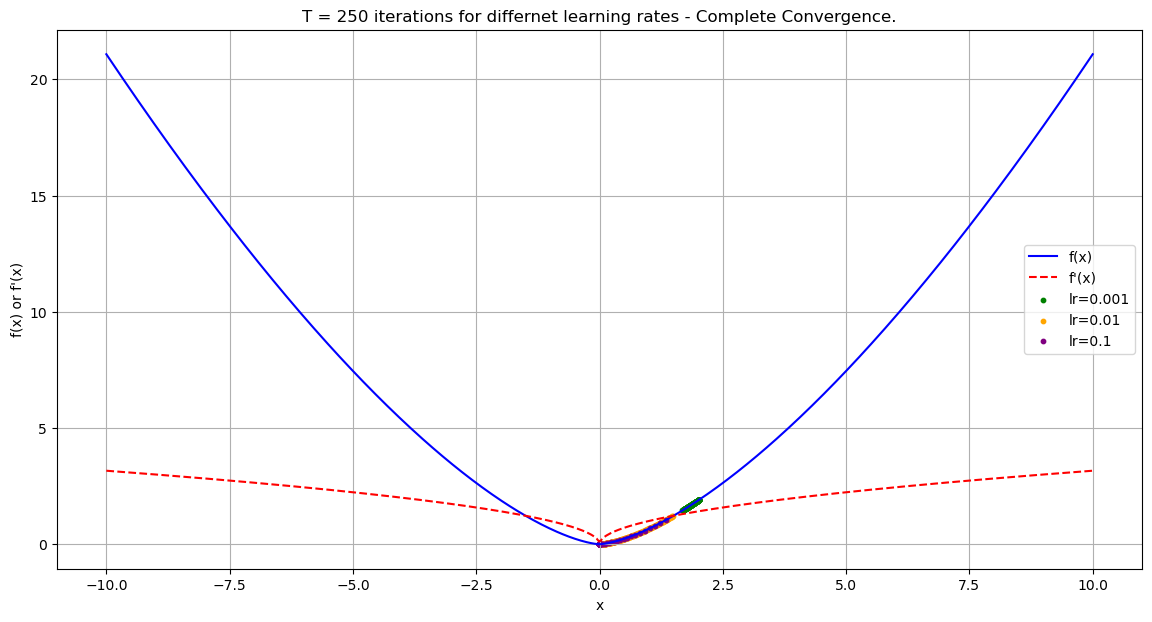

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    
    if x >= 0:
        return (2/3)*(x**(3/2))
    else:
        return (2/3)*((-x)**(3/2))
    
def grad(x):
    
    if x>=0:
        return np.sqrt(x)
    else:
        return np.sqrt(-x)
    
def gradient_desc(x_initial,lr,T):
    
    x=x_initial
    data_record =[]
    
    for t in range(T):
        
       
        data_record.append((x, func(x)))
        if x>=0:
            x = x - lr*np.sqrt(x)
        else:
            x = x + lr*np.sqrt(-x)
#             x -= learning_rate * derivative(x)
        
        
    return data_record

# we will initialize x in 2 ways -- one from a predefine set and other will be randomly from a continuous distribution

def initialize_starting_point(lr,use_list):
    S = [0, lr**2, -1*(lr**2),(3+np.sqrt(5))/2 *(lr**2),-1*(3+np.sqrt(5))/2 *(lr**2)]  # as mentioned in paper
    
    if use_list:  # use_list will either be true or false depending on choice of initialization
        return np.random.choice(S)

    else:
        return np.random.uniform(-3, 3)
    
if __name__ == "__main__":
    
    learning_rates = [1e-3,1e-2,1e-1]
    T = 250 # number of iteration
    full_record = {}
    for rate in learning_rates:
        x0 = initialize_starting_point(rate,use_list = False)   # initial value of x changes with rate when choosing from pre-defined list
        full_record[rate] = gradient_desc(x0,rate,T)
        
    x_values = np.linspace(-10, 10, 500)
    f_values = np.array([func(x) for x in x_values])
    df_values = np.array([grad(x) for x in x_values])
    
    plt.figure(figsize=(14, 7))
    
    plt.plot(x_values, f_values, label='f(x)', color='blue')
    plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--') 
    
    colors = ['green', 'orange', 'purple']
    for i, (rate, data_record) in enumerate(full_record.items()):
        data_record = np.array(data_record)
        print(data_record[:, 1])
        plt.scatter(data_record[:, 0], data_record[:, 1], color=colors[i], label=f'lr={rate}', s=10) 
        
    plt.xlabel('x')
    plt.ylabel('f(x) or f\'(x)')
    plt.title('T = 250 iterations for differnet learning rates - Complete Convergence.')
    #plt.title('Function f(x) and its derivative f\'(x)')
    plt.legend()
    plt.grid(True)
    plt.show()